<a href="https://colab.research.google.com/github/renanalencar/projeto-md-emocoes/blob/main/Assign10_Teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 10


## Descrição da atividade

1. Escolha algum algoritmo de REGRA DE ASSOCIAÇÃO apresentados na aula, aplique ao seu projeto.
- Lembre-se de variar os parâmetros.


2. Defina a metodologia experimental.
- Divisão da base de dados, range de parâmetros e métricas de avaliação.


3. Descreva os resultados obtidos.


4. Entregue a seção 2.2, 3.4 e 4.1 do artigo.

## Referências:


* [Aula 10 - Regras de Associação](https://drive.google.com/file/d/16ybZx_CleXpl0u5T4GndIcefZ0EBBi_0/view)

*   [Implementing Apriori algorithm in Python](https://www.geeksforgeeks.org/implementing-apriori-algorithm-in-python/)
*   [Association Rule Learning with Scikit-learn](https://www.kaggle.com/sangwookchn/association-rule-learning-with-scikit-learn)

*   [Introduction to Apriori Algorithm in Python](https://intellipaat.com/blog/data-science-apriori-algorithm/)
* [Apriori: Association Rule Mining In-depth Explanation and Python Implementation](https://towardsdatascience.com/apriori-association-rule-mining-explanation-and-python-implementation-290b42afdfc6)
* [Association Rule Mining via Apriori Algorithm in Python](https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/)
* [Frequent Itemsets via Apriori Algorithm](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/)
*   [Understand and Build FP-Growth Algorithm in Python](https://towardsdatascience.com/understand-and-build-fp-growth-algorithm-in-python-d8b989bab342)
*   [Implementing Apriori and FP-growth](https://www.oreilly.com/library/view/practical-machine-learning/9781784399689/ch07s02.html)
*   [FP Growth: Frequent Pattern Generation in Data Mining with Python Implementation](https://towardsdatascience.com/fp-growth-frequent-pattern-generation-in-data-mining-with-python-implementation-244e561ab1c3)



## Bibliotecas Utilizadas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.frequent_patterns import association_rules
import itertools
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Base

A base é de dados singulares, logo foi criada uma lógica, após normalização dos dados. Os campos que apresentarem valores expressivos, maiores que 0.5, terão seus campos setados para "1" e aqueles que não atenderem a regra terão serão setados para "0". 

In [ ]:
path = '/content/drive/Shareddrives/MINERAÇÃO DE DADOS ENG74291/Assign10/dadosTedioB.xlsx'
dataset = pd.read_excel(path, index_col=0)
dataset.drop(["game_name"], axis=1,inplace=True)
dataset = dataset.dropna()
dataset.reset_index(drop=True,inplace=True)

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(dataset)
dataset2 = scaler.transform(dataset)

dataset2 = pd.DataFrame(dataset2)
dataset2.columns = dataset.columns

for i in dataset2.columns:
  for j in dataset2.index:
    if dataset2[i][j] >= 0.5:
      dataset2[i][j]= 1
    else:  
       dataset2[i][j] = 0

dataset = pd.DataFrame(dataset2)
dataset = dataset.rename_axis(columns=None)

df = dataset.loc[:,'p1':'p24']

Mostrar o resutado após transformação

In [ ]:
df.head(5)

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0


Este código é para a transformação, no nosso caso não foi necessário devido a transformação anterior. A nossa base diverge deste tipo de estudo.

In [ ]:
# # Transformação desnecessária
# te = TransactionEncoder()
# te_ary = te.fit(dataset).transform(dataset)
# df = pd.DataFrame(te_ary, columns=te.columns_)
# df

In [ ]:
df.shape

(35955, 24)

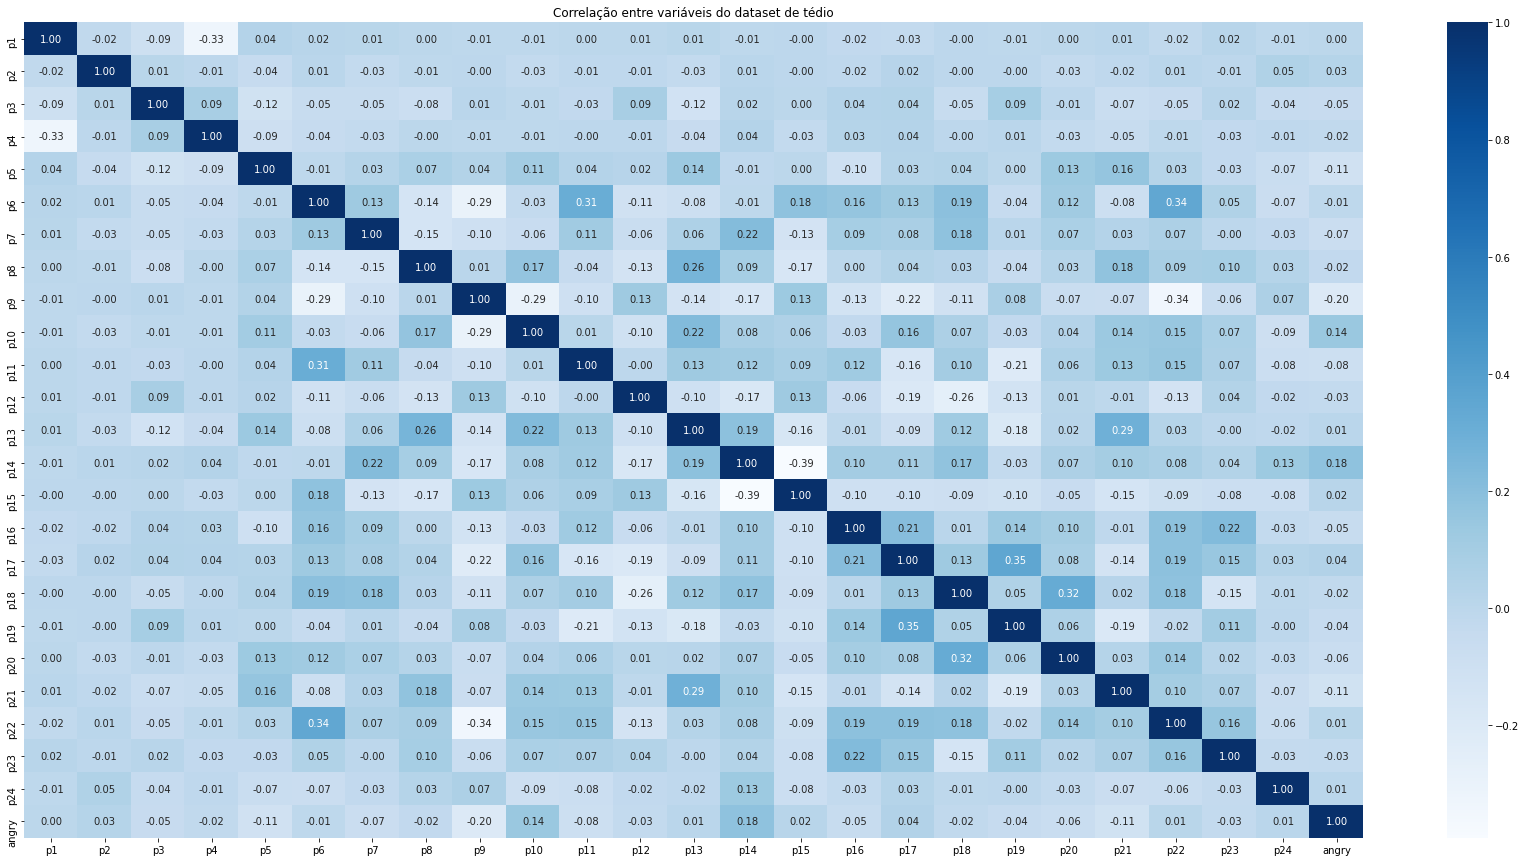

In [ ]:
import seaborn as sns

df_tratado = pd.DataFrame(df)
df_tratado['angry'] =  dataset['angry']

filtro = df_tratado['angry'] >= 0.5
if df_tratado[filtro] is True:
      df_tratado['angry'] = 1

plt.figure(figsize=(30, 15))
sns.heatmap(df_tratado.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de tédio')
plt.show()

Text(0.5, 1.0, 'Importância de cada feature')

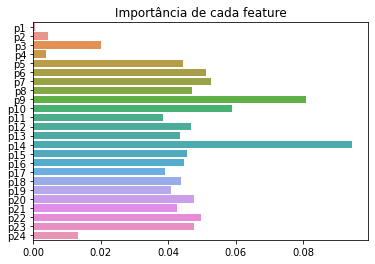

In [ ]:
# criar os conjuntos de dados e classes para treinamento e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(df_tratado.drop(columns=['angry']), df_tratado.angry, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
clf_RFC  = RandomForestClassifier()
clf_RFC.fit(X_treinamento, y_treinamento)

# Mostrando importância de cada feature
clf_RFC.feature_importances_

importances = pd.Series(data=clf_RFC.feature_importances_, index=df_tratado.columns[0:24])
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

Gráfico, mas achei o resultado meio estranho. Qualquer coisa podemos mudar ou alterar o tipo de gráfico.

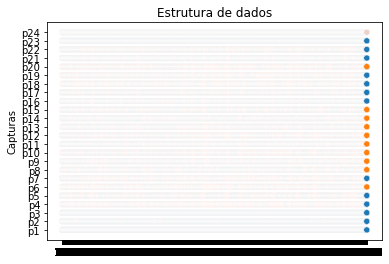

In [ ]:
p = df.copy()
for i in range(1, len(p.columns)+1):
    p["Cat"] = np.where(p[p.columns[i]] == 1, 1, 0)
    p[p.columns[i]]= i
    g =sns.scatterplot(p.index, p[p.columns[i]], hue = p.Cat, legend = False)
    g.yaxis.set_label_text('Capturas')
    g.set_yticks(np.arange(1, len(p.columns)))
    g.set_xticks(df.index)
    g.set_yticklabels(df.columns)
    plt.title("Estrutura de dados")

Encontrar a frequência de itens.

In [ ]:

df.sum()

p1     35899.0
p2       123.0
p3      2048.0
p4       313.0
p5     27674.0
p6     20262.0
p7     23453.0
p8     24525.0
p9     18139.0
p10    20296.0
p11    23440.0
p12    17729.0
p13    23202.0
p14    16758.0
p15    16179.0
p16    17687.0
p17    13378.0
p18    19659.0
p19    23813.0
p20    25892.0
p21    26860.0
p22    13086.0
p23    21172.0
p24     1118.0
dtype: float64

## Apriori

Cálculo do Suporte com mínimo de 60%.

In [ ]:
apriori(df, min_support=0.6, use_colnames=True)

,support,itemsets
0,0.998442,(p1)
1,0.769684,(p5)
2,0.652288,(p7)
3,0.682103,(p8)
4,0.651926,(p11)
5,0.645307,(p13)
6,0.662300,(p19)
7,0.720122,(p20)
8,0.747045,(p21)
9,0.769072,"(p1, p5)"


Selecionando e filtrando os resultados.

In [ ]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.998442,(p1),1
1,0.769684,(p5),1
2,0.652288,(p7),1
3,0.682103,(p8),1
4,0.651926,(p11),1
5,0.645307,(p13),1
6,0.662300,(p19),1
7,0.720122,(p20),1
8,0.747045,(p21),1
9,0.769072,"(p1, p5)",2


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.7) ]

,support,itemsets,length
9,0.769072,"(p1, p5)",2
15,0.719010,"(p1, p20)",2
16,0.746044,"(p1, p21)",2


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'p1', 'p13'} ]

,support,itemsets,length
13,0.644584,"(p1, p13)",2


In [ ]:
te = TransactionEncoder()
oht_ary = te.fit(df).transform(df, sparse=True)
sparse_df = pd.DataFrame.sparse.from_spmatrix(oht_ary, columns=te.columns_)
sparse_df

,0,1,2,3,4,5,6,7,8,9,p
0,0,1,0,0,0,0,0,0,0,0,True
1,0,0,1,0,0,0,0,0,0,0,True
2,0,0,0,1,0,0,0,0,0,0,True
3,0,0,0,0,1,0,0,0,0,0,True
4,0,0,0,0,0,1,0,0,0,0,True
5,0,0,0,0,0,0,1,0,0,0,True
6,0,0,0,0,0,0,0,1,0,0,True
7,0,0,0,0,0,0,0,0,1,0,True
8,0,0,0,0,0,0,0,0,0,1,True
9,1,1,0,0,0,0,0,0,0,0,True


In [ ]:
apriori(sparse_df, min_support=0.5, use_colnames=True)

,support,itemsets
0,0.5,(1)
1,1.0,(p)
2,0.5,"(p, 1)"


Definindo um valor limite para o valor de suporte e calculando o valor de suporte. 

In [ ]:
df_new = apriori(df, min_support = 0.2, use_colnames = True)
df_new

,support,itemsets
0,0.998442,(p1)
1,0.769684,(p5)
2,0.563538,(p6)
3,0.652288,(p7)
4,0.682103,(p8)
...,...,...
2468,0.218996,"(p21, p8, p10, p1, p20, p5, p13)"
2469,0.212961,"(p21, p8, p11, p1, p20, p5, p13)"
2470,0.210430,"(p21, p8, p1, p20, p18, p5, p13)"
2471,0.202920,"(p21, p11, p1, p20, p18, p5, p13)"


Vendo os valores de interpretação usando a função da regra de associação.

In [ ]:
df_ar = association_rules(df_new, metric = "confidence", min_threshold = 0.6)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(p1),(p5),0.998442,0.769684,0.769072,0.770272,1.000764,0.000587,1.002559
1,(p5),(p1),0.769684,0.998442,0.769072,0.999205,1.000764,0.000587,1.959196
2,(p6),(p1),0.563538,0.998442,0.563065,0.999161,1.000720,0.000405,1.856360
3,(p7),(p1),0.652288,0.998442,0.651537,0.998849,1.000407,0.000265,1.352893
4,(p1),(p7),0.998442,0.652288,0.651537,0.652553,1.000407,0.000265,1.000764
...,...,...,...,...,...,...,...,...,...
17725,"(p11, p20, p18)","(p7, p21, p1, p13)",0.333278,0.372966,0.201196,0.603689,1.618615,0.076895,1.582174
17726,"(p11, p18, p13)","(p7, p21, p1, p20)",0.281602,0.377472,0.201196,0.714469,1.892775,0.094899,2.180248
17727,"(p7, p20, p13)","(p21, p11, p1, p18)",0.335113,0.307384,0.201196,0.600382,1.953196,0.098187,1.733194
17728,"(p7, p18, p13)","(p20, p21, p11, p1)",0.293005,0.384369,0.201196,0.686664,1.786468,0.088574,1.964759


In [ ]:
df_results = list(df_ar)
print(len(df_results))

9


In [ ]:
df_results

['antecedents',
 'consequents',
 'antecedent support',
 'consequent support',
 'support',
 'confidence',
 'lift',
 'leverage',
 'conviction']

# FP-Growth(Frequent Pattern Growth) utilizando pyfpgrowth




In [ ]:
!pip install pyfpgrowth

In [ ]:
import pyfpgrowth

Encontrar padrões frequentes em capturas que ocorrem acima do limite de suporte

In [ ]:
patterns = pyfpgrowth.find_frequent_patterns(df, 2)

In [ ]:
patterns

{('0',): 2,
 ('0', 'p'): 2,
 ('1',): 13,
 ('1', '2'): 2,
 ('1', '2', 'p'): 2,
 ('1', 'p'): 13,
 ('2',): 8,
 ('2', 'p'): 8,
 ('3',): 3,
 ('3', 'p'): 3,
 ('4',): 3,
 ('4', 'p'): 3,
 ('5',): 2,
 ('5', 'p'): 2,
 ('6',): 2,
 ('6', 'p'): 2,
 ('7',): 2,
 ('7', 'p'): 2,
 ('8',): 2,
 ('8', 'p'): 2,
 ('9',): 2,
 ('9', 'p'): 2,
 ('p',): 24}

Use gerar regras de associação para encontrar padrões que estão associados a outro com uma certa probabilidade mínima

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [ ]:
rules

{('0',): (('p',), 1.0),
 ('1',): (('p',), 1.0),
 ('1', '2'): (('p',), 1.0),
 ('2',): (('p',), 1.0),
 ('3',): (('p',), 1.0),
 ('4',): (('p',), 1.0),
 ('5',): (('p',), 1.0),
 ('6',): (('p',), 1.0),
 ('7',): (('p',), 1.0),
 ('8',): (('p',), 1.0),
 ('9',): (('p',), 1.0)}

## FP-Growth utilizando o Spark

### Referência

* [Market Basket Analysis using PySpark](https://towardsdatascience.com/market-basket-analysis-using-pysparks-fpgrowth-55c37ebd95c0)

In [ ]:
%%capture
!sudo apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
#!wget -q https://downloads.apache.org/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz
!mv spark-3.0.0-bin-hadoop3.2.tgz sparkkk
!tar xf sparkkk
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession \
.builder \
.appName('fpgrowth') \
.getOrCreate()
spark

In [ ]:
from pyspark.sql import functions as F
from pyspark.ml.fpm import FPGrowth
import pandas
sparkdata = spark.createDataFrame(df)

In [ ]:
capturedata = sparkdata.dropDuplicates(['p1', 'p5']).sort('p1')
capturedata = capturedata.groupBy("p1").agg(F.collect_list("p5")).sort('p1')

 Executando o FP-Growth minerando um conjuntos de itens frequentes usando support, lift, e confidence

In [ ]:
fpGrowth = FPGrowth(itemsCol="collect_list(p5)", minSupport=0.006, minConfidence=0.006)
model = fpGrowth.fit(capturedata)

Exibir conjuntos de itens frequentes.

In [ ]:
model.freqItemsets.show()
items = model.freqItemsets

Exibir regras de associação geradas.

In [ ]:
model.associationRules.show()
rules = model.associationRules

Examinar os itens de entrada em relação a todas as regras de associação e resumir os consequentes como predição

In [ ]:
model.transform(capturedata).show()
transformed = model.transform(capturedata)

In [ ]:
result_pdf = items.select("*").toPandas()
result_pdf.head()

,items,freq
0,[0.0],2
1,[1.0],2
2,"[1.0, 0.0]",2


In [ ]:
rules_pdf = rules.select("*").toPandas()
rules_pdf.head()

,antecedent,consequent,confidence,lift,support
0,[1.0],[0.0],1.0,1.0,1.0
1,[0.0],[1.0],1.0,1.0,1.0
